In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import os
import warnings

In [2]:
imdb_data=pd.read_csv('IMDB Dataset.csv')
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [3]:
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [4]:
imdb_data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [5]:
#split the dataset
#train dataset
train_reviews=imdb_data.review[:40000]
train_sentiments=imdb_data.sentiment[:40000]
#test dataset
test_reviews=imdb_data.review[40000:]
test_sentiments=imdb_data.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)


(40000,) (40000,)
(10000,) (10000,)


In [6]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHREYASH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [7]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [8]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(denoise_text)

C:\Users\SHREYASH\AppData\Local\Temp\ipykernel_14532\2729271993.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [9]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

In [10]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

{'needn', 'have', 'who', "won't", 'a', "we'd", 'only', "i'd", "he'll", 'their', 'no', "we'll", "isn't", "they'd", 'haven', 'aren', 'hasn', 'being', 'don', 'into', 'that', 'this', 'i', "i'll", 'shan', "doesn't", 'didn', "they'll", 'an', 'at', 'as', 'd', 'on', 'other', 'between', 'doing', 'down', 'yourselves', 'wouldn', 'further', "he's", "it'll", "weren't", 'to', 'its', 'do', 'and', 'ours', "aren't", 'weren', 'was', 'doesn', 'in', 'below', 'once', 'the', 'these', 'with', 'ain', 'not', 'those', 'when', 'ourselves', 'same', 'too', "couldn't", 'were', 'he', 'for', 'up', "i'm", "it'd", 'having', 'ma', "wasn't", 'all', "they're", "she'd", 'we', "she'll", 'had', "that'll", 'them', 'here', "shouldn't", 'over', 'isn', 'there', 'did', 'against', 'if', 'she', 'than', "you've", 'wasn', 'own', 'off', 'couldn', "you're", 'himself', 'or', 'before', 'by', 'any', 'nor', 'what', 'll', "hadn't", 'herself', 'theirs', 'been', "mightn't", 't', "haven't", 'o', 'few', "don't", "shan't", 'after', 'y', 'above',

In [11]:
#normalized train reviews
norm_train_reviews=imdb_data.review[:40000]
norm_train_reviews[0]

'One reviewers mentioned watching 1 Oz episode youll hooked right exactly happened meThe first thing struck Oz brutality unflinching scenes violence set right word GO Trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordIt called OZ nickname given Oswald Maximum Security State Penitentary focuses mainly Emerald City experimental section prison cells glass fronts face inwards privacy high agenda Em City home manyAryans Muslims gangstas Latinos Christians Italians Irish moreso scuffles death stares dodgy dealings shady agreements never far awayI would say main appeal show due fact goes shows wouldnt dare Forget pretty pictures painted mainstream audiences forget charm forget romanceOZ doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste Oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle 

In [12]:
#Normalized test reviews
norm_test_reviews=imdb_data.review[40000:]
norm_test_reviews[45005]



'read reviews watching piece cinematic garbage took least 2 pages find somebody else didnt think appallingly unfunny montage WASNT acme humour 70s indeed era isnt least funny set sketch comedy Ive ever seen itll till comes along Half skits already done infinitely better acts Monty Python Woody Allen say nice piece animation lasts 90 seconds highlight film would still get close summing mindless drivelridden waste 75 minutes Seminal comedy world seminal really mean semen Scatological humour world scat actually feces Precursor jokes mean handbook comedy Tits bums odd beaver Niceif pubescent boy least one hand free havent found Playboy exists Give break early 70s way sketch comedy going back least ten years prior way could even forgive film even made gunpoint Retro Hardly Sketches clowns subtly perverting children may cutting edge circles could actually funny comes really quite sad kept going throughout entire 75 minutes Sheer belief may saved genuinely funny skit end gave film 1 lower sco

In [13]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0.0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (40000, 6675873)
BOW_cv_test: (10000, 6675873)


In [14]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0.0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6675873)
Tfidf_test: (10000, 6675873)


In [15]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(imdb_data['sentiment'])
print(sentiment_data.shape)


(50000, 1)


In [16]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [17]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

C:\Users\SHREYASH\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


C:\Users\SHREYASH\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


In [18]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)


[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]


In [19]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)


mnb_bow_score : 0.744
mnb_tfidf_score : 0.7442


In [20]:
#Classification report for bag of words
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)


              precision    recall  f1-score   support

    Positive       0.74      0.75      0.75      4993
    Negative       0.75      0.74      0.74      5007

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000

              precision    recall  f1-score   support

    Positive       0.74      0.75      0.75      4993
    Negative       0.75      0.73      0.74      5007

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



In [21]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)



[[3690 1317]
 [1243 3750]]
[[3680 1327]
 [1231 3762]]


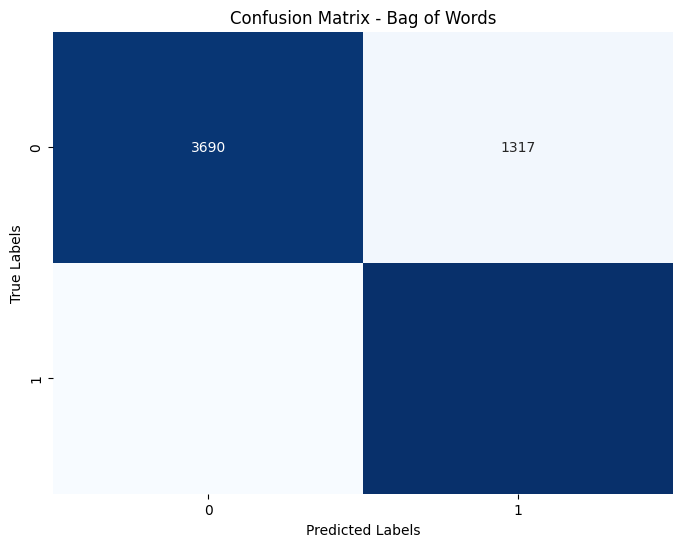

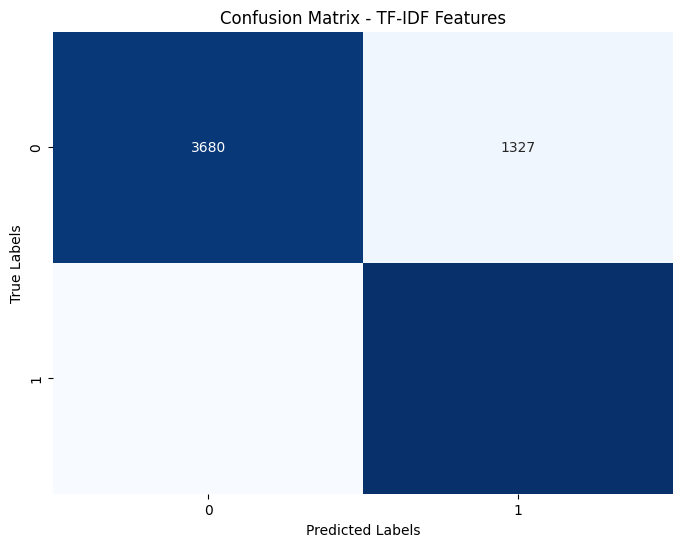

In [22]:

# Plotting confusion matrix for bag of words
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bow, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Bag of Words")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plotting confusion matrix for tfidf features
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tfidf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - TF-IDF Features")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

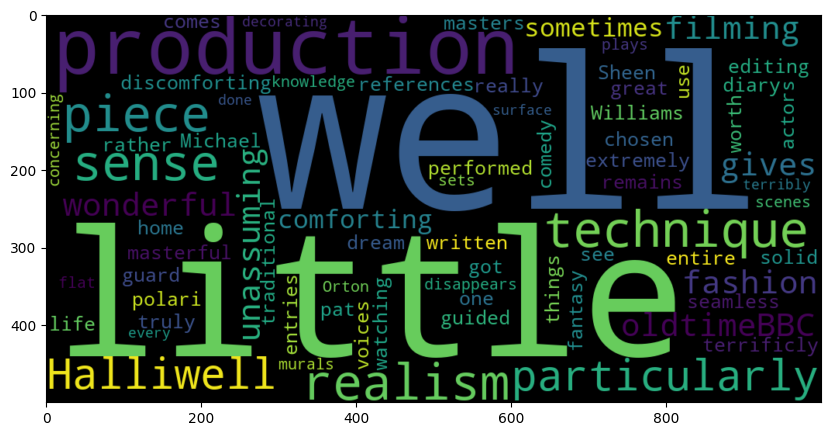

In [23]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

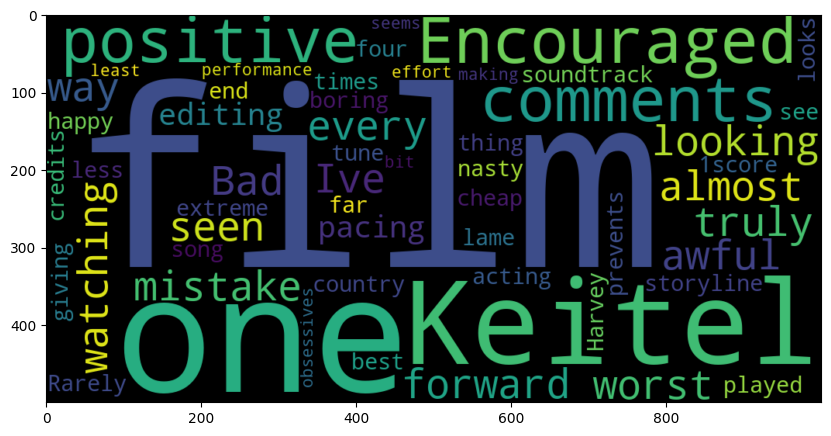

In [24]:

#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

In [25]:
import tkinter as tk
from tkinter import messagebox
from textblob import TextBlob
from PIL import ImageTk, Image

class SentimentAnalysisApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Sentiment Analysis")
        
        # Load the background image
        self.background_image = Image.open("IMDB-Screenshot_1.png")  # Replace "sent.jpg" with your image file
        self.background_image = self.background_image.resize((root.winfo_screenwidth(), root.winfo_screenheight()))
        self.background_photo = ImageTk.PhotoImage(self.background_image)

        # Create a label to display the background image
        self.background_label = tk.Label(root, image=self.background_photo)
        self.background_label.place(x=0, y=0, relwidth=1, relheight=1)
        
        # Initialize welcome message variables
        self.welcome_labels = ["Welcome to Movie Review Analysis Tool !", "Powered by AI Dreamers", "Analyze your Review now!"]
        self.current_welcome_index = 0
        self.label_welcome = tk.Label(root, text=self.welcome_labels[self.current_welcome_index], font=("Garamond","20","italic", "bold"), bg='darkmagenta',borderwidth=2, fg="cyan", relief='ridge', width=root.winfo_screenwidth())
        self.label_welcome.pack()
        
        # Create a text entry field
        self.label_marquee("  Please Enter Text (Related to movie) for Analysis.  ")
        self.text_entry = tk.Text(root, width=70, height=5, font=("Times new roman","15"))
        
        # Create a button to trigger sentiment analysis
        self.analyze_button = tk.Button(root, text="Analyze",font=("Times new roman","15"),bg='blue',width=22, borderwidth=2, fg="white", relief="groove",command=self.analyze_sentiment)
        
        # Start updating welcome message
        self.update_welcome_message()

        # Get the screen width and height
        screen_width = root.winfo_screenwidth()
        screen_height = root.winfo_screenheight()
        root.geometry(f"{screen_width}x{screen_height}+0+0")

        # Place input elements in the GUI
        self.text_entry.pack(padx=0, pady=0)
        self.analyze_button.pack(padx=10, pady=35)

    # Function to analyze sentiment
    def analyze_sentiment(self):
        # Get user input
        user_input = self.text_entry.get("1.0", tk.END)
        
        # Check if input is empty
        if not user_input.strip():
            messagebox.showwarning("Empty Input", "Please enter some text.")
            return
        
        # Perform sentiment analysis
        polarity = TextBlob(user_input).sentiment.polarity
        
        # Determine sentiment based on polarity
        if polarity > 0:
            sentiment = "Positive"
        elif polarity < 0:
            sentiment = "Negative"
        else:
            sentiment = "Neutral"
       
        # Show result in a messagebox
        messagebox.showinfo("Movie Review Analysis Result", f"The sentiment of the input text is: {sentiment}")
    #Function slider animation for welcome message
    def update_welcome_message(self):
        self.label_welcome.config(text=self.welcome_labels[self.current_welcome_index])
        self.current_welcome_index = (self.current_welcome_index + 1) % len(self.welcome_labels)
        self.root.after(2000, self.update_welcome_message)
    # Marquee animation for Enter message   
    def label_marquee(self, text, delay=150):
        self.label_marquee_var = tk.StringVar()
        self.label_marquee_var.set(text)
        self.marquee_label = tk.Label(self.root, textvariable=self.label_marquee_var, font=("Helvetica", "20", "bold", "italic"), bg='yellow',width=41, borderwidth=1, fg="green", relief="solid")
        self.marquee_label.pack(padx=25, pady=25)
        self.animate_marquee(delay)
        
    def animate_marquee(self, delay):
        text = self.label_marquee_var.get()
        text = text[1:] + text[0]
        self.label_marquee_var.set(text)
        self.root.after(delay, self.animate_marquee, delay)

        
# Create the main window
root = tk.Tk()

# Create an instance of the SentimentAnalysisApp
app = SentimentAnalysisApp(root)

# Run the GUI loop
root.mainloop()
